In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import glob
import os

In [2]:
spots_path = "../../data/images/spots/"

In [3]:
file = open("../output/spots_with_surfers.txt", "r")
path_list = file.read().split("\n")

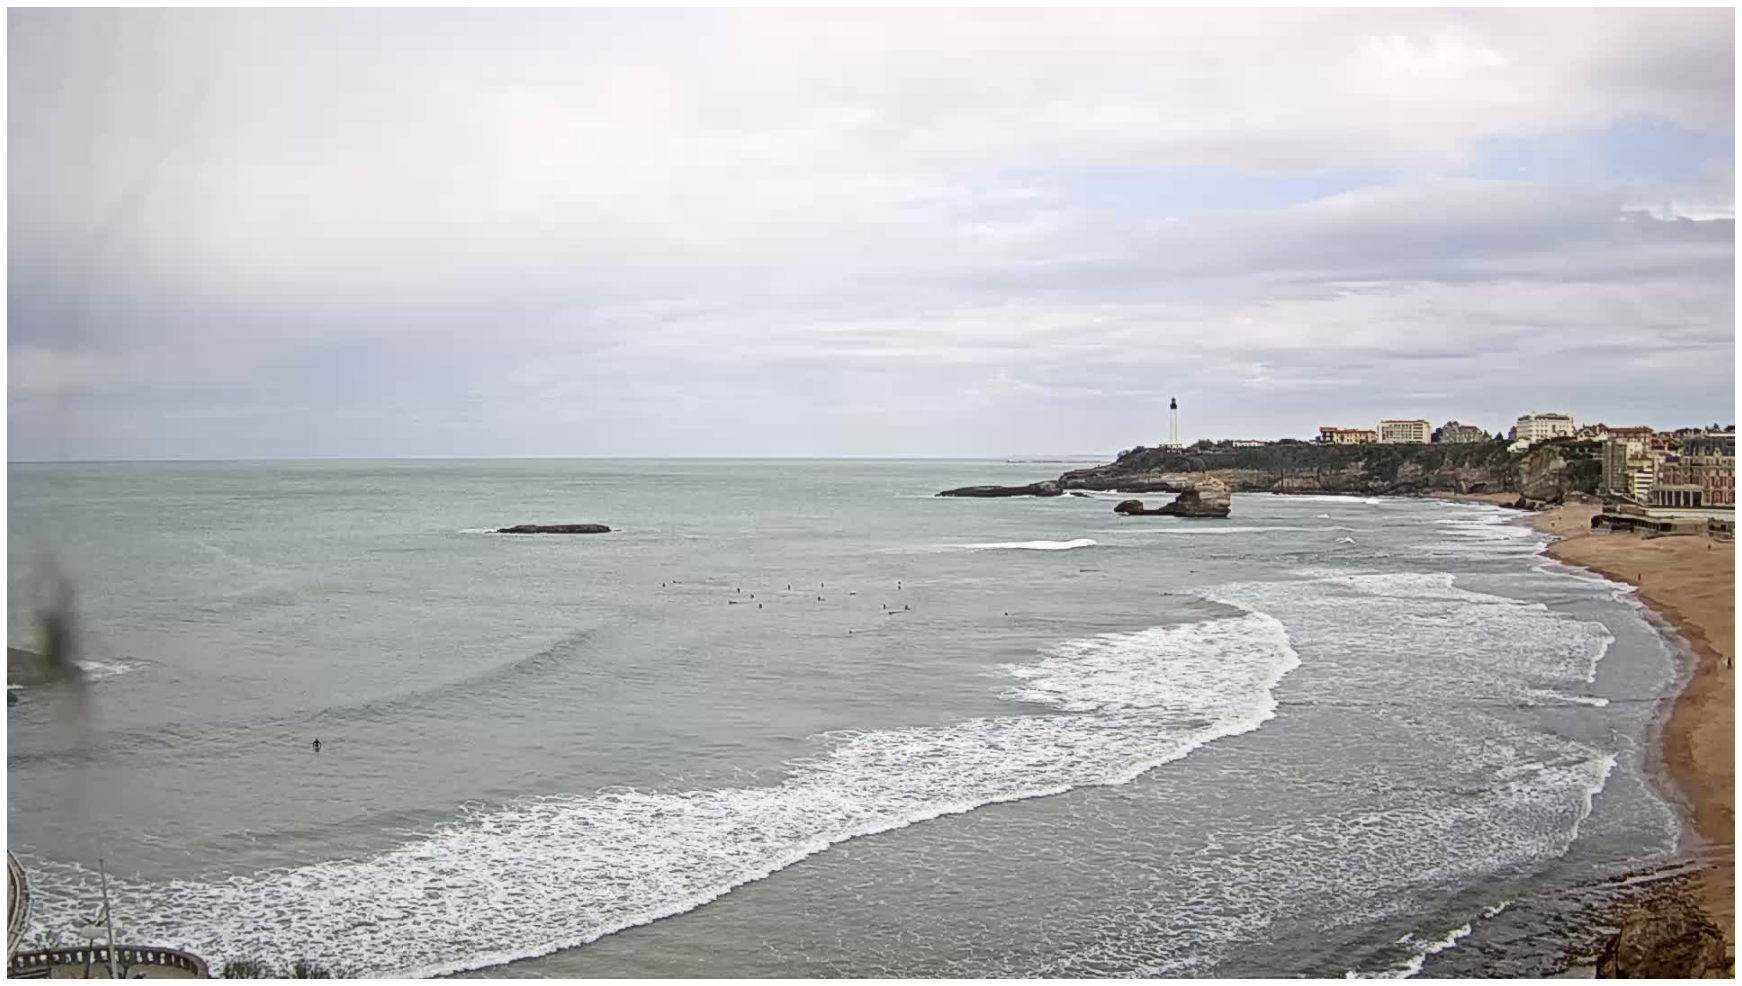

In [4]:
import random
images = [spots_path + path for path in random.choices(path_list, k=1)]
def display_image_in_actual_size(im_path):

    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

display_image_in_actual_size(images[0])

In [5]:
df = pd.DataFrame([{"spot": x.split('/')[0],
                    "date": x.split('/')[-1].split('_')[0]} for x in path_list])

In [6]:
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")

In [7]:
df['pred']=1

In [8]:
df = df.groupby(["spot", "date"])['pred'].agg('sum').reset_index()

In [9]:
all_dates_spots = pd.DataFrame({'date': pd.date_range(df.date.min(),df.date.max(),freq='d')}).merge(pd.DataFrame({'spot': df.spot.unique().tolist()}), how='cross')
df = df.merge(all_dates_spots,
              on=['date', 'spot'],
              how='right')
df.fillna(0, inplace=True)

In [10]:
import seaborn as sns

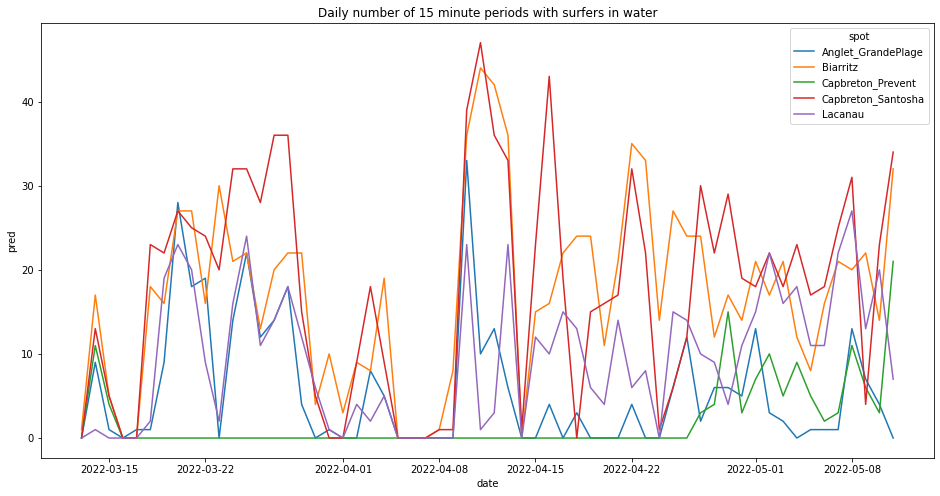

In [11]:
plt.figure(figsize=(16, 8))
sns.lineplot(x="date", y="pred", data=df, hue="spot").set(title='Daily number of 15 minute periods with surfers in water')
plt.show()

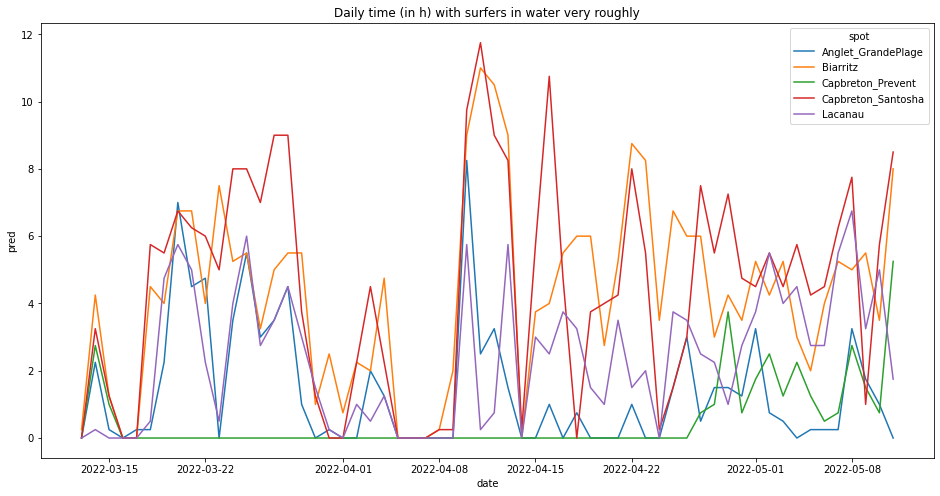

In [12]:
df.pred *= 15/60
plt.figure(figsize=(16, 8))
sns.lineplot(x="date", y="pred", data=df, hue="spot").set(title='Daily time (in h) with surfers in water very roughly')
plt.show()